<a href="https://colab.research.google.com/github/leopra/TextClassificationEmbedding/blob/master/EutopiaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls drive/My\ Drive/Dataset


dataset.pickle


In [ ]:
import pandas as pd
import keras
import numpy as np
from keras.regularizers import L1L2
import matplotlib.pyplot as plt

np.random.seed(42)
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
data = pd.read_pickle('/content/drive/My Drive/Dataset/dataset.pickle')
df= data[['home_text', 'AI']]
df

home_text  AI
0     Skip to main content Products GPU accelerated database Spotlyt visualisation Solutions Retail Telecoms Finance Logistics DNA Oil & Gas Resources Blog Documentation Technical Support Videos White Papers About Us Our Team Partners & Customers Contact World s fastest and most advanced GPU database Brytlyt combines the power of GPUs with patent pending IP and is built on PostgreSQL. Gains within hours of being deployed Up to 1,000 times faster than traditional systems. Seamless integration with your existing infrastructure using data connectors. Feature rich and easy to use tools based on PostgreSQL. Add GPU cloud resources on the fly, so your systems can scale with your needs. Don t let your visualisation tool slow you down SpotLyt is Brytlyt s super-fast analytics workbench and is a complete tool for analysts, data scientists and business intelligence. Brytlyt s GPU database smashes benchmark record again In an independent benchmark , Brytlyt s GPU Database outperformed all other vendors by a factor of four or more, with its PostgreSQL fork tapping into the super computing power of IBM Minsky Hardware. World's Most Advanced GPU Accelerated Database Brytlyt s GPU database and analytics platform, with patent pending IP, is transforming the way businesses use data. Multibillion row datasets can now be queried in seconds, at massively reduced cost. Astonishing performance With a data processing speed that is up to 1,000 times faster than traditional systems within hours of deployment, Brytlyt s GPU-powered platform can provide real time insights on large and streaming data sets. Easy integration with existing systems There s no need to lose your current investments in code, analytics and visualisation. Instead, accelerate them with Brytlyt with little to no effort. Smooth scalability Add and remove GPU resources at will, scaling your processing capability to suit your needs, ensuring you can massively reduce your data processing costs. Functionality-rich & easy to use Brytlyt is built on PostgreSQL, and its deep functionality is complimented by outstanding ease of use. Learn More Products Find out more Find out more Solutions In a world where data driven decision making is more important than ever before, being able to improve time to-value by answering more complex questions, for more people, on ever growing amounts of data is essential. Retail Telecoms Finance Logistics DNA Oil & Gas Partners Customers Company Values Brytlyt is a young and dynamic company with a clear mission to empower organisations through transformational data analytics . We firmly believe that the heart of achieving this is delivering Speed of Thought Analytics at Scale . Integrity We look after each other, our customers and our partners. Energy We are passionate and committed, with a can-do attitude. Excellence We expect the very best from ourselves and our partners. Follow us on Twitter Follow us on LinkedIn Contact Blog Sitemap 2020 Copyright Brytlyt Contact Us Whitepaper Get In Touch Free Trial. Energy We are passionate and committed, with a can-do attitude. Excellence We expect the very best from ourselves and our partners. Follow us on Twitter Follow us on LinkedIn Contact Blog Sitemap 2020 Copyright Brytlyt Contact Us Whitepaper Get In Touch Free Trial. Excellence We expect the very best from ourselves and our partners. Follow us on Twitter Follow us on LinkedIn Contact Blog Sitemap 2020 Copyright Brytlyt Contact Us Whitepaper Get In Touch Free Trial. Energy We are passionate and committed, with a can-do attitude. Excellence We expect the very best from ourselves and our partners. Follow us on Twitter Follow us on LinkedIn Contact Blog Sitemap 2020 Copyright Brytlyt Contact Us Whitepaper Get In Touch Free Trial                                                                                                                                                                                                                                   

In [ ]:
print('percentage Nan values') 
for col in data.columns:
  print(col + ' ' + str(sum(pd.isnull(data[str(col)])/len(data))) + '%')


percentage Nan values
crunchbase_ID 0.0%
home_text 0.0%
aboutus_text 0.5480179812014624%
overview_text 0.9865140988965909%
whatwedo_text 0.9897834082549889%
company_text 0.9025337147527429%
whoweare_text 0.9830404577032931%
AI 0.0%


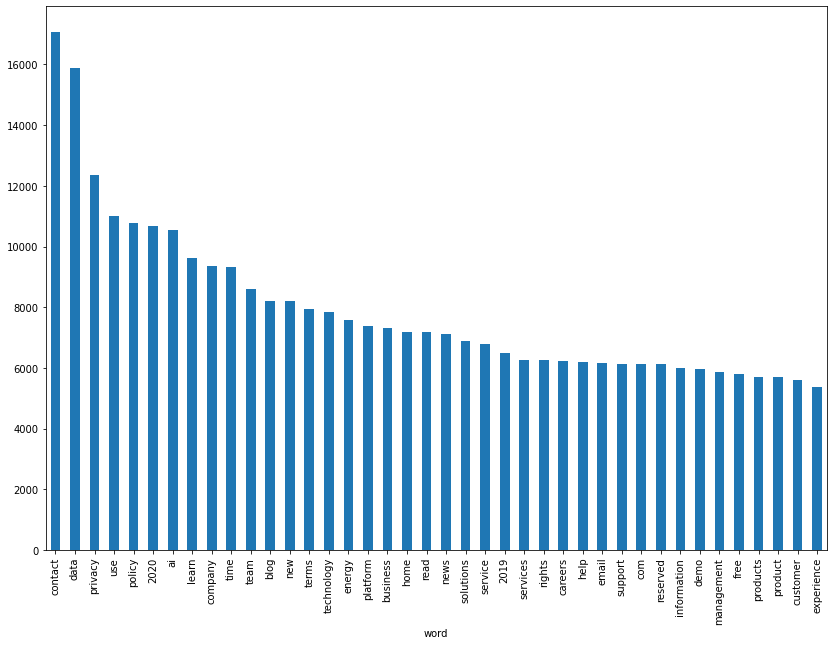

In [ ]:
#statistics
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['home_text'], 40)
# for word, freq in common_words:
#     print(word, freq)

plt.figure(figsize=(14,10))
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')



In [ ]:
# preprocess dataset 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 


example_sent = "This b is a sample! sentence, showing off the stop words filtration e-commerce ab_c 99. -----abc"

def encode_sequence(listseq):
  #match 'all characters' AND 'not digits'
  tokenizer = RegexpTokenizer(r'(?=\D)[a-zA-Z\-]{2,}') #TODO this cancels the word AI
  stop_words = set(stopwords.words('english'))
  word_tokens = tokenizer.tokenize(listseq) 
  filtered_sentence = [w.lower() for w in word_tokens if not w in stop_words] 
  
  return filtered_sentence

encode_sequence(example_sent)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['this',
 'sample',
 'sentence',
 'showing',
 'stop',
 'words',
 'filtration',
 'e-commerce',
 'ab',
 '-----abc']

In [ ]:
#########################################################
# THIS IS NOT USED

# from keras.preprocessing.text import Tokenizer

# def remove_stopwords(input_text):
#   stopwords_list = stopwords.words('english')
#   words = input_text.split(' ')
#   whitelist = [] #TODO
#   clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
#   return " ".join(clean_words) 

# tk = Tokenizer(num_words=10000,
#                filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{"}~\t\n',
#                lower=True,
#                char_level=False,
#                split=' ')

# tk.fit_on_texts(df['home_text'])

#tk.word_index
#X_train_oh[2]

In [ ]:
df['token_text'] = df.apply(lambda row: encode_sequence(row[1])+encode_sequence(row[2]), axis=1)

df['length'] = df['token_text'].apply(lambda row : len(row))
#df2.home_text = df.home_text.apply(encode_sequence)
#VECTORIZED VERSION 9/08/2020
#df.home_text = df.home_text.apply(remove_stopwords)

def f(x):
  return x[1] + x[2]

TypeError: ignored

In [ ]:
data.loc[df['length']< 100]



In [ ]:
class Vocabulary:
    PAD_token = 0   # Used for padding short sentences
    OOW_token = 1   # out-of vocabulary token
    EOS_token = 2   # End-of-sentence token

    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "<PAD>", 1: "<OOW>", 2: "<SOS>"}
        self.num_words = 3
        self.num_sentences = 0
        self.longest_sentence = 0

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; increase word count
            self.word2count[word] += 1
            
    def add_sentence(self, sentence):
        sentence_len = 0
        for word in sentence.split(' '):
            sentence_len += 1
            self.add_word(word)
        if sentence_len > self.longest_sentence:
            # This is the longest sentence
            self.longest_sentence = sentence_len
        # Count the number of sentences
        self.num_sentences += 1

    def to_word(self, index):
        return self.index2word[index]

    def to_index(self, word):
        return self.word2index[word]

In [ ]:
#build vocabulary
datanum= df['token_text'].to_numpy()
voc = Vocabulary('test')

def add_words2voc(listsent, vocabulary):
  for sent in listsent:
    for word in sent:
        try:
          vocabulary.add_word(word)
        except:
          print('Errore:', word)

add_words2voc(datanum, voc)


In [ ]:
vocAI1 = Vocabulary('AI1')
vocAI0 = Vocabulary('AI0')
add_words2voc(df.loc[(df['AI'] == 0)]['token_text'], vocAI0)
add_words2voc(df.loc[(df['AI'] == 1)]['token_text'], vocAI1)


In [ ]:
wordsai1 = [(x,n) for x,n in sorted(vocAI1.word2count.items(), key=lambda x:x[1], reverse=True)] #and x not in list(vocAI0.word2count)]
wordsai0 = [(x,n) for x,n in sorted(vocAI0.word2count.items(), key=lambda x:x[1], reverse=True)]
print(wordsai0)

In [ ]:
#process words to be used 
NUM_WORDS = 8000


def process(dictio, min_freq=0, max_freq=90000, max_number=-1):
  if max_number != -1:
    newdict = [x[0] for x in sorted(voc.word2count.items(), key=lambda x:x[1], reverse=True) if x[1]>min_freq and x[1]<max_freq][:max_number]
    return { x : i for i,x in enumerate(newdict, 1)}

word2index = process(voc, max_number = NUM_WORDS) #TODO complete function

print(len(sorted(word2index.items(), key=lambda x:x[1], reverse=False)))

In [ ]:
#build encoding

##################### choose witch
#VOC = tk.word_index
VOC = word2index
#VOC = dict(sorted(VOC.items(), key= lambda x:x[1])[:num_words])

def convert2index(tokenlist):
  x = []
  for word in tokenlist:
      if word in VOC.keys():
        x.append(VOC[word])
      else:
        x.append(0)
  return x

df['encoded_text'] = df['token_text'].apply(convert2index)

dataenc = np.array(df['encoded_text'])



In [ ]:
df[:4]

In [ ]:
#padding and train test split
from sklearn.model_selection import train_test_split

maxlen = 700

X = keras.preprocessing.sequence.pad_sequences(dataenc, maxlen=maxlen)#, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X, np.array(df['AI']), test_size=0.25)

print(X_train[900])


In [ ]:
reverse_index = {word_id: word for word, word_id in VOC.items()}

In [ ]:
def decode_review(word_ids):
    return " ".join([reverse_index.get(word_id, "*") for word_id in word_ids])

In [ ]:
decode_review(X_train[900])

In [ ]:
#this model performed better (81% test) maybe because the train data is not enough
#to avoid overfitting of Rnns

model = keras.models.Sequential()
model.add(keras.layers.Embedding(NUM_WORDS+1, 100, input_length=maxlen))
model.add(keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history= model.fit(X_train, y_train, epochs=30, validation_split=0.2)

In [ ]:
modelb = keras.models.Sequential()
modelb.add(keras.layers.Embedding(input_dim=NUM_WORDS+1, output_dim=10))
modelb.add(keras.layers.Dense(maxlen))
modelb.add(keras.layers.Dropout(0.3))
modelb.add(keras.layers.Dense(maxlen/2))
modelb.add(keras.layers.Dropout(0.5))
modelb.add(keras.layers.Dense(maxlen/4))
modelb.add(keras.layers.Dropout(0.5))
modelb.add(keras.layers.Dense(1, activation="sigmoid"))

modelb.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

modelb.summary()

history = modelb.fit(X_train, y_train,
                    epochs=10, batch_size=10, validation_split=0.2)

In [ ]:
#model training

model_bidirectional = keras.models.Sequential()
model_bidirectional.add(keras.layers.Embedding(input_dim=NUM_WORDS+1, output_dim=20))
model_bidirectional.add(keras.layers.Bidirectional(keras.layers.LSTM(86)))
model_bidirectional.add(keras.layers.Dense(200))
model_bidirectional.add(keras.layers.Dropout(0.5))
model_bidirectional.add(keras.layers.Dense(200))
model_bidirectional.add(keras.layers.Dense(1, activation="sigmoid"))

model_bidirectional.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model_bidirectional.summary()

history = model_bidirectional.fit(X_train, y_train,
                    epochs=100, batch_size=10, validation_split=0.2)




In [ ]:
from tensorflow.keras import regularizers as regul

reg = L1L2(l1=0.1, l2=0.01)

model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=NUM_WORDS+1, output_dim=10))
model.add(keras.layers.LSTM(32, recurrent_regularizer=reg,  recurrent_dropout=0.4))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=10, batch_size=10, validation_split=0.2)


In [ ]:
print(X_train.shape)

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)


In [ ]:

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))